# Advertising Modeling Analysis


## Introduction
This analysis aims to build predictive models to estimate sales based on advertising budgets across three channels: TV, Radio, and Newspaper. This is a regression problem where the goal is to predict the continuous outcome (sales) based on the input features (advertising budgets). The process involves data cleaning, exploratory data analysis (EDA), feature selection, model building, model evaluation, and selecting the best-performing model.

## 1. Data Cleaning
The dataset was loaded, and it was confirmed that there were no missing values. Summary statistics were generated to understand the basic distribution of the data.

## 2. Exploratory Data Analysis (EDA)
EDA was performed using pair plots and a correlation heatmap:
- **Pair Plots**: Visualized the relationships between TV, Radio, Newspaper budgets, and Sales.
- **Correlation Heatmap**: Indicated positive correlations between the advertising budgets and sales, with TV showing the strongest correlation.

## 3. Feature Selection
The features selected for modeling were:
- **TV**: Advertising budget for TV.
- **Radio**: Advertising budget for Radio.
- **Newspaper**: Advertising budget for Newspaper.
The target variable was **Sales**.

## 4. Model Building
The following models were built and evaluated:
- **Linear Regression**
- **Decision Tree**
- **Random Forest** (with hyperparameter tuning using GridSearchCV)
- **Gradient Boosting** (with hyperparameter tuning using GridSearchCV)

## 5. Model Evaluation
The models were evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics:

| Model              | MSE       | R-squared |
|--------------------|-----------|-----------|
| Linear Regression  | 3.174097  | 0.899438  |
| Decision Tree      | 2.175000  | 0.931091  |
| Random Forest      | 0.573405  | 0.981833  |
| Gradient Boosting  | 0.601117  | 0.980955  |



**Decision Tree** was identified as the best-performing model based on the highest R-squared value and lowest MSE.

## Best Model Saving and Loading
The best model (Decision Tree) was saved for future use, and predictions were made on new, unseen data using the saved model.

## Feature Importance Analysis
Feature importance was analyzed for the Decision Tree model, highlighting the contributions of each feature (TV, Radio, Newspaper) to the sales predictions.

## Conclusion
The Decision Tree model provided the highest predictive accuracy, making it the best choice for predicting sales based on advertising budgets. This model can be used to make reliable predictions and informed decisions regarding advertising budget allocations.

**Note**: The saved best model can be loaded and used for making predictions on new data. The analysis also provides insights into which advertising channels are most influential in driving sales.


### **Data Used**

1. advertising : https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv, feature : 'TV' , target : 'Sales'


# **Import Libraries and Load Dataset**

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('advertising.csv')  

# Display the first 5 rows of the dataset
print(df.head())



   SN     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   10.8       58.4   12.9


In [3]:
# Display the last 5 rows of the dataset
print(df.tail())



      SN     TV  Radio  Newspaper  Sales
195  196   38.2    3.7       13.8    7.6
196  197   94.2    4.9        8.1    9.7
197  198  177.0    9.3        6.4   12.8
198  199  283.6   42.0       66.2   25.5
199  200  232.1    8.6        8.7   13.4


In [4]:
# Display the shape of the dataset
print(df.shape)



(200, 5)


In [5]:
# Summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
                SN          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


# **Step 1: Data Cleaning**

In [6]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

Missing values:
 SN           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Summary statistics:
                SN          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


# **Step 2: Exploratory Data Analysis (EDA)**

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

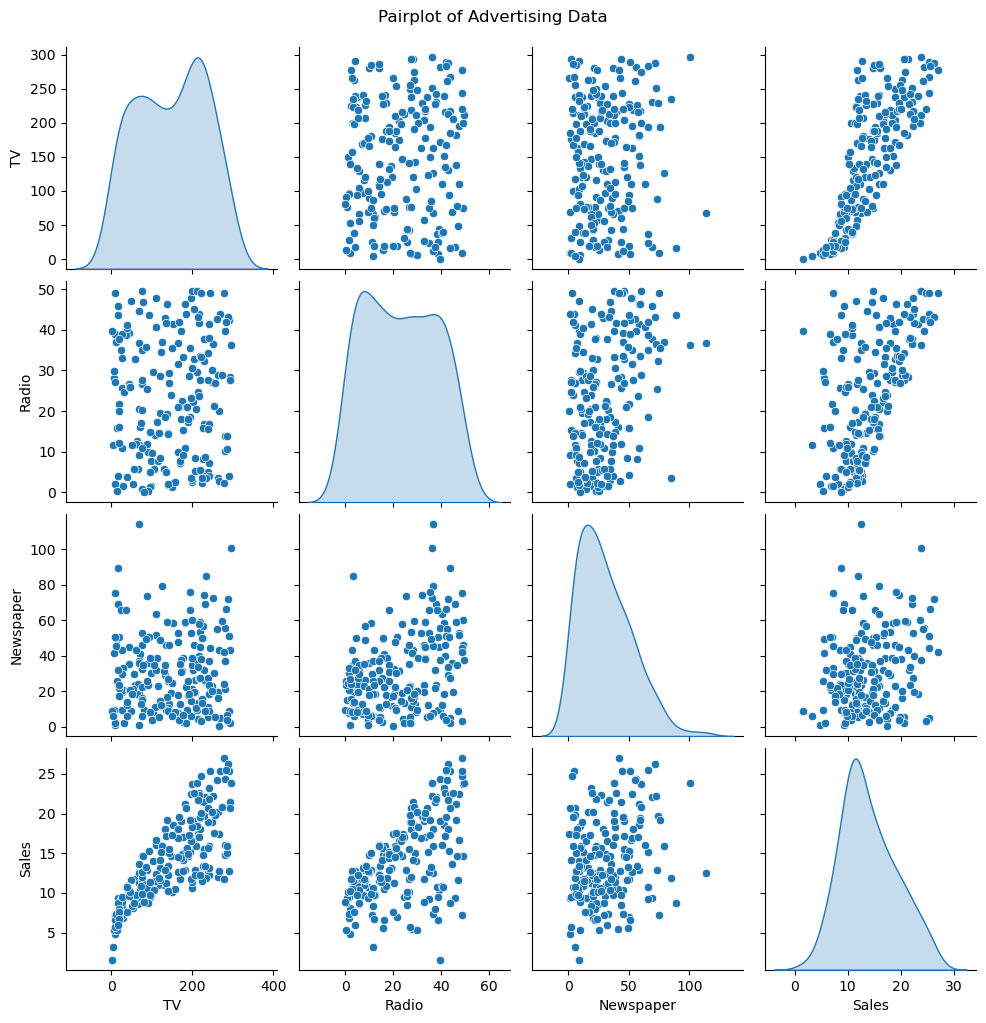

In [7]:
# Pairplot to visualize relationships between variables
sns.pairplot(df.drop(columns=['SN']), diag_kind='kde')
plt.suptitle('Pairplot of Advertising Data', y=1.02)
plt.show()

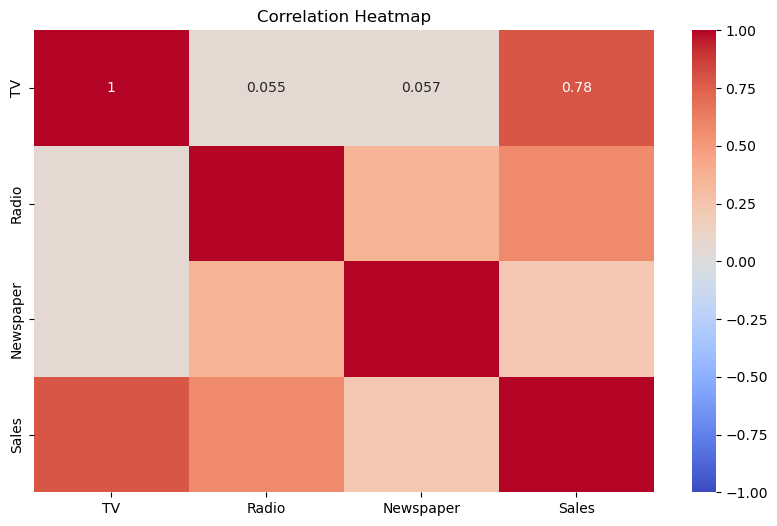

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.drop(columns=['SN']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

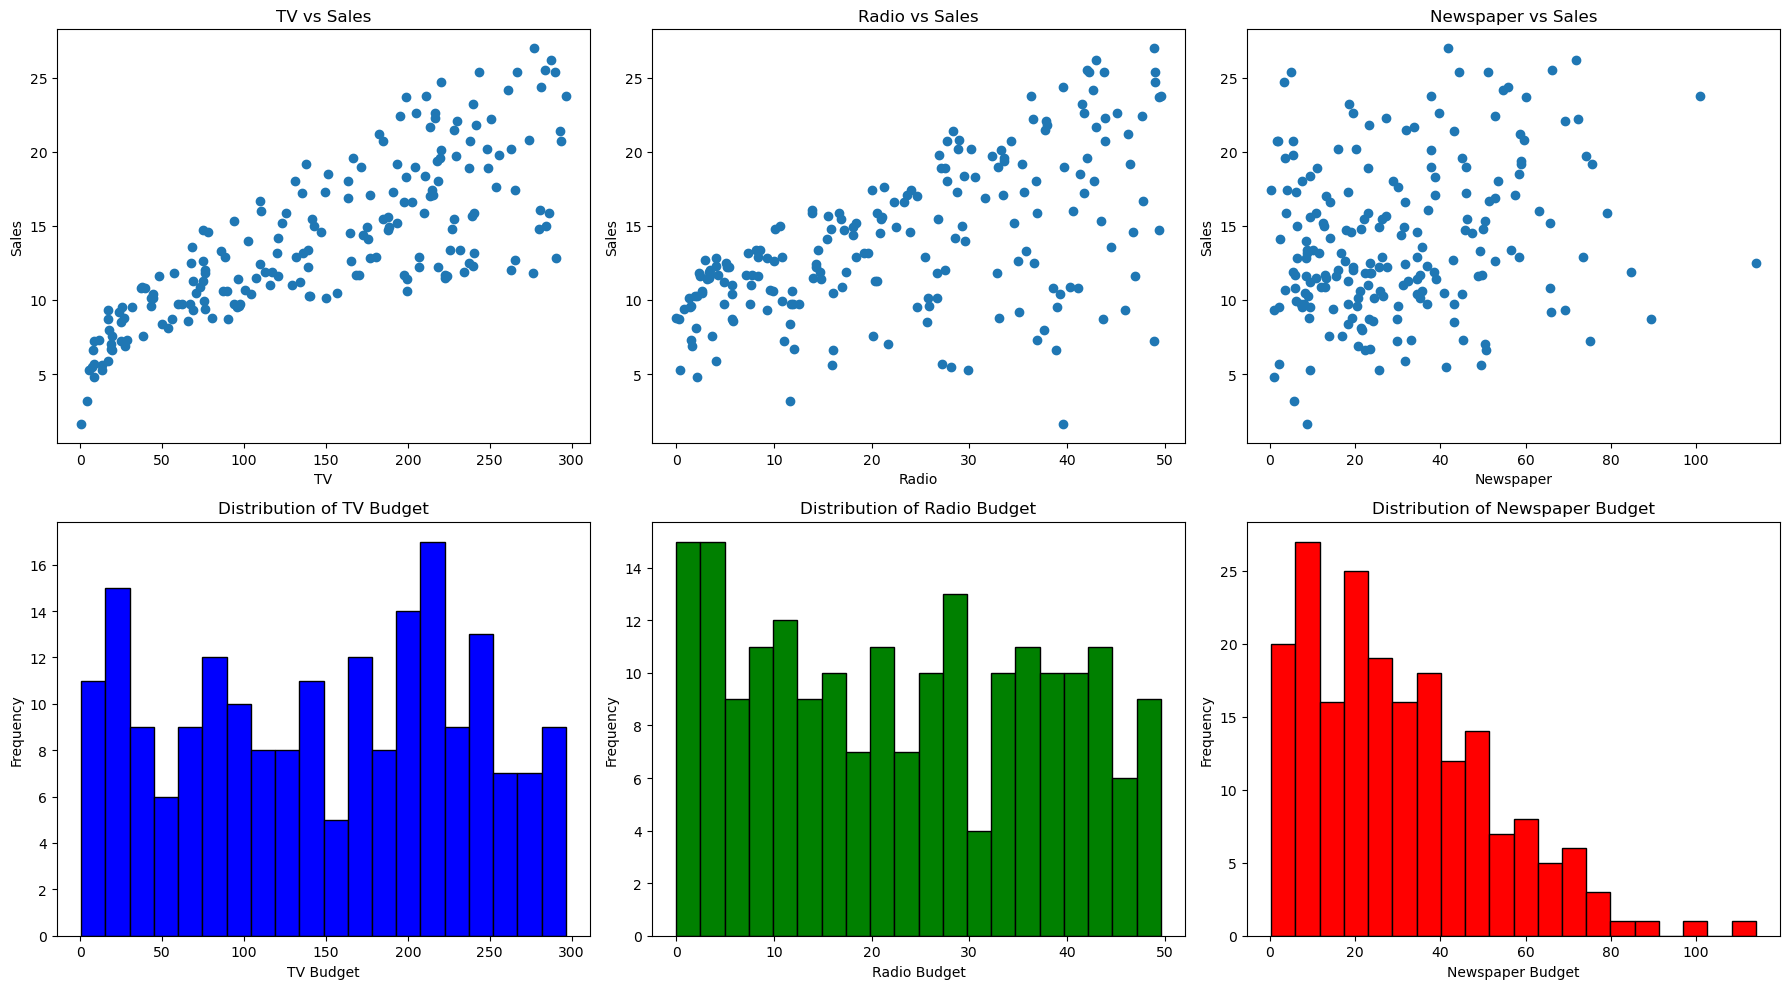

SN             int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [9]:
# Check data types
data_types = df.dtypes

# Scatter plots and histograms
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Scatter plots
axs[0, 0].scatter(df['TV'], df['Sales'])
axs[0, 0].set_title('TV vs Sales')
axs[0, 0].set_xlabel('TV')
axs[0, 0].set_ylabel('Sales')

axs[0, 1].scatter(df['Radio'], df['Sales'])
axs[0, 1].set_title('Radio vs Sales')
axs[0, 1].set_xlabel('Radio')
axs[0, 1].set_ylabel('Sales')

axs[0, 2].scatter(df['Newspaper'], df['Sales'])
axs[0, 2].set_title('Newspaper vs Sales')
axs[0, 2].set_xlabel('Newspaper')
axs[0, 2].set_ylabel('Sales')

# Histograms
axs[1, 0].hist(df['TV'], bins=20, color='blue', edgecolor='black')
axs[1, 0].set_title('Distribution of TV Budget')
axs[1, 0].set_xlabel('TV Budget')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Radio'], bins=20, color='green', edgecolor='black')
axs[1, 1].set_title('Distribution of Radio Budget')
axs[1, 1].set_xlabel('Radio Budget')
axs[1, 1].set_ylabel('Frequency')

axs[1, 2].hist(df['Newspaper'], bins=20, color='red', edgecolor='black')
axs[1, 2].set_title('Distribution of Newspaper Budget')
axs[1, 2].set_xlabel('Newspaper Budget')
axs[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

data_types


# **Step 3: Feature Selection**

In [10]:
# Features and target variable
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# **Step 4: Model Building**

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train and evaluate models

In [12]:
# Train and evaluate models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

## Define parameter grids for GridSearchCV

In [13]:
# Define parameter grids for GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

## Store results

In [14]:
# Store results
results = {
    'Model': [],
    'MSE': [],
    'R-squared': []
}

## Track the best model

In [15]:
# Track the best model
best_model = None
best_score = float('-inf')
best_model_name = ""

## Train and evaluate each model

In [16]:
# Train and evaluate each model
for model_name, model in models.items():
    if model_name in param_grids:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)
        best_model = model
    
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)
    
    # Check if this model is the best so far
    if r2 > best_score:
        best_score = r2
        best_model_name = model_name
        best_model_overall = best_model

# **Step 5: Model Evaluation**

In [17]:
# Create a DataFrame to compare results
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)


Model Comparison:
                Model       MSE  R-squared
0  Linear Regression  3.174097   0.899438
1      Decision Tree  2.175000   0.931091
2      Random Forest  0.573405   0.981833
3  Gradient Boosting  0.601117   0.980955


# **Save the best model (Random Forest in this case)**

In [18]:
# Save the best model
best_model_filename = f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl'
joblib.dump(best_model_overall, best_model_filename)
print(f"\nBest model ({best_model_name}) saved as {best_model_filename}")


Best model (Random Forest) saved as best_model_random_forest.pkl


# **Making predictions with unseen Data**

In [19]:
# Load the saved model
loaded_model = joblib.load(best_model_filename)

# Making predictions with the loaded model
new_data = pd.DataFrame({
    'TV': [200.0, 150.0],
    'Radio': [30.0, 40.0],
    'Newspaper': [50.0, 20.0]
})

# Make predictions
new_predictions = loaded_model.predict(new_data)
print(f"\nPredictions for new data: {new_predictions}")


Predictions for new data: [18.3605 17.9845]


# **Feature Importance Analysis**

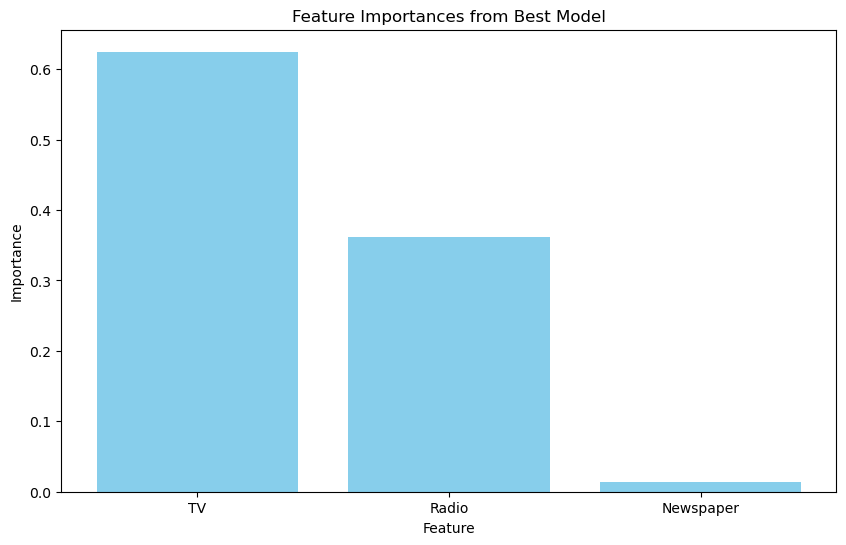

In [20]:
# Feature Importance Analysis (if applicable)
if hasattr(loaded_model, 'feature_importances_'):
    importances = loaded_model.feature_importances_
    features = X.columns
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.title('Feature Importances from Best Model')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()
else:
    print(f"The best model ({best_model_name}) does not support feature importance analysis.")